# monkey dataset
- Sample: macaca embryos
- Author: Yiming Chao @HKU & CTSCB
- Update: 2025-6-10

# all adata

In [46]:
import scanpy as sc
import anndata as ad
import pandas as pd

In [47]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80,dpi_save=100,color_map='Reds')
sc.logging.print_version_and_date()

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
plt.show()
matplotlib.rcParams.update({'figure.figsize': (6,6)})

Running Scanpy 1.10.3, on 2025-03-29 02:03.


In [3]:
adata = sc.read_h5ad('/mnt/troyli/public/for_yiming_monkey/all.h5ad')

In [15]:
adata

AnnData object with n_obs × n_vars = 99889 × 61471
    obs: 'Batch', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'Stage', 'Species'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst_counts.4_variance.standardized', 'vf_vst_counts.4_variable', 'vf_vst_counts.4_rank', 'var.features', 'var.features.rank'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'

In [19]:
adata.obs['Batch'].value_counts()

Batch
Tan_2023         74473
Zhai_2022        23767
Jiang_2019        1453
Thorsten_2018      196
Name: count, dtype: int64

In [20]:
adata_Tan = adata[adata.obs['Batch']=='Tan_2023']

In [22]:
adata_Jiang = adata[adata.obs['Batch']=='Jiang_2019']

In [25]:
adata_Jiang.obs['Stage'].unique()

array(['d.p.f.11', 'd.p.f.12', 'd.p.f.13', 'd.p.f.14', 'd.p.f.16',
       'd.p.f.17'], dtype=object)

In [6]:
adata = adata[adata.obs['Stage'].isin(['d.p.f.11',
 'd.p.f.12',
 'd.p.f.13',
 'd.p.f.14',
 'd.p.f.16',
 'd.p.f.17',
 'CS8'])]

In [7]:
adata

View of AnnData object with n_obs × n_vars = 13082 × 61471
    obs: 'Batch', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'Stage', 'Species'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst_counts.4_variance.standardized', 'vf_vst_counts.4_variable', 'vf_vst_counts.4_rank', 'var.features', 'var.features.rank'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'

In [8]:
# create a dictionary to map stage to day label
stage_day = {
    "d.p.f.11": "D11",
    "d.p.f.12": "D12",
    "d.p.f.13": "D13",
    "d.p.f.14": "D14",
    "d.p.f.16": "D16",
    "d.p.f.17": "D17",
    "CS8": "D20"
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs["Day"] = adata.obs["Stage"].map(stage_day).astype("category")

/tmp/ipykernel_961820/334268631.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["Day"] = adata.obs["Stage"].map(stage_day).astype("category")


In [9]:
adata.obs['day'] = pd.to_numeric(adata.obs['Day'].str[1:])

In [10]:
adata.obs

Batch  nCount_RNA  nFeature_RNA            celltype  \
MFI111_sc01         Jiang_2019     50398.0          6799  TE and derivatives   
MFI111_sc02         Jiang_2019    258864.0         10393           postE-EPI   
MFI111_sc03         Jiang_2019     43416.0          7161                EXMC   
MFI111_sc04         Jiang_2019    153372.0          7429  TE and derivatives   
MFI111_sc05         Jiang_2019      8738.0          3597               VE/YE   
...                        ...         ...           ...                 ...   
TTTGTTGCATGGAGAC-2   Zhai_2022      5729.0          2641                  VE   
TTTGTTGGTCCTGGGT-2   Zhai_2022      1965.0           817            ys.Endo2   
TTTGTTGGTGCAGTGA-2   Zhai_2022     12272.0          3965           Caud.Meso   
TTTGTTGTCCATTGTT-2   Zhai_2022      3336.0          1628                  VE   
TTTGTTGTCGATTGGT-2   Zhai_2022      5299.0          2235                  VE   

                       Stage              Species  Day  day  
MFI111_sc01         d.p.f.11  Macaca fascicularis  D11   11  
MFI111_sc02         d.p.f.11  Macaca fascicularis  D11   11  
MFI111_sc03         d.p.f.11  Macaca fascicularis  D11   11  
MFI111_sc04         d.p.f.11  Macaca fascicularis  D11   11  
MFI111_sc05         d.p.f.11  Macaca fascicularis  D11   11  
...                      ...                  ...  ...  ...  
TTTGTTGCATGGAGAC-2       CS8  Macaca fascicularis  D20   20  
TTTGTTGGTCCTGGGT-2       CS8  Macaca fascicularis  D20   20  
TTTGTTGGTGCAGTGA-2       CS8  Macaca fascicularis  D20   20  
TTTGTTGTCCATTGTT-2       CS8  Macaca fascicularis  D20   20  
TTTGTTGTCGATTGGT-2       CS8  Macaca fascicularis  D20   20  

[13082 rows x 8 columns]

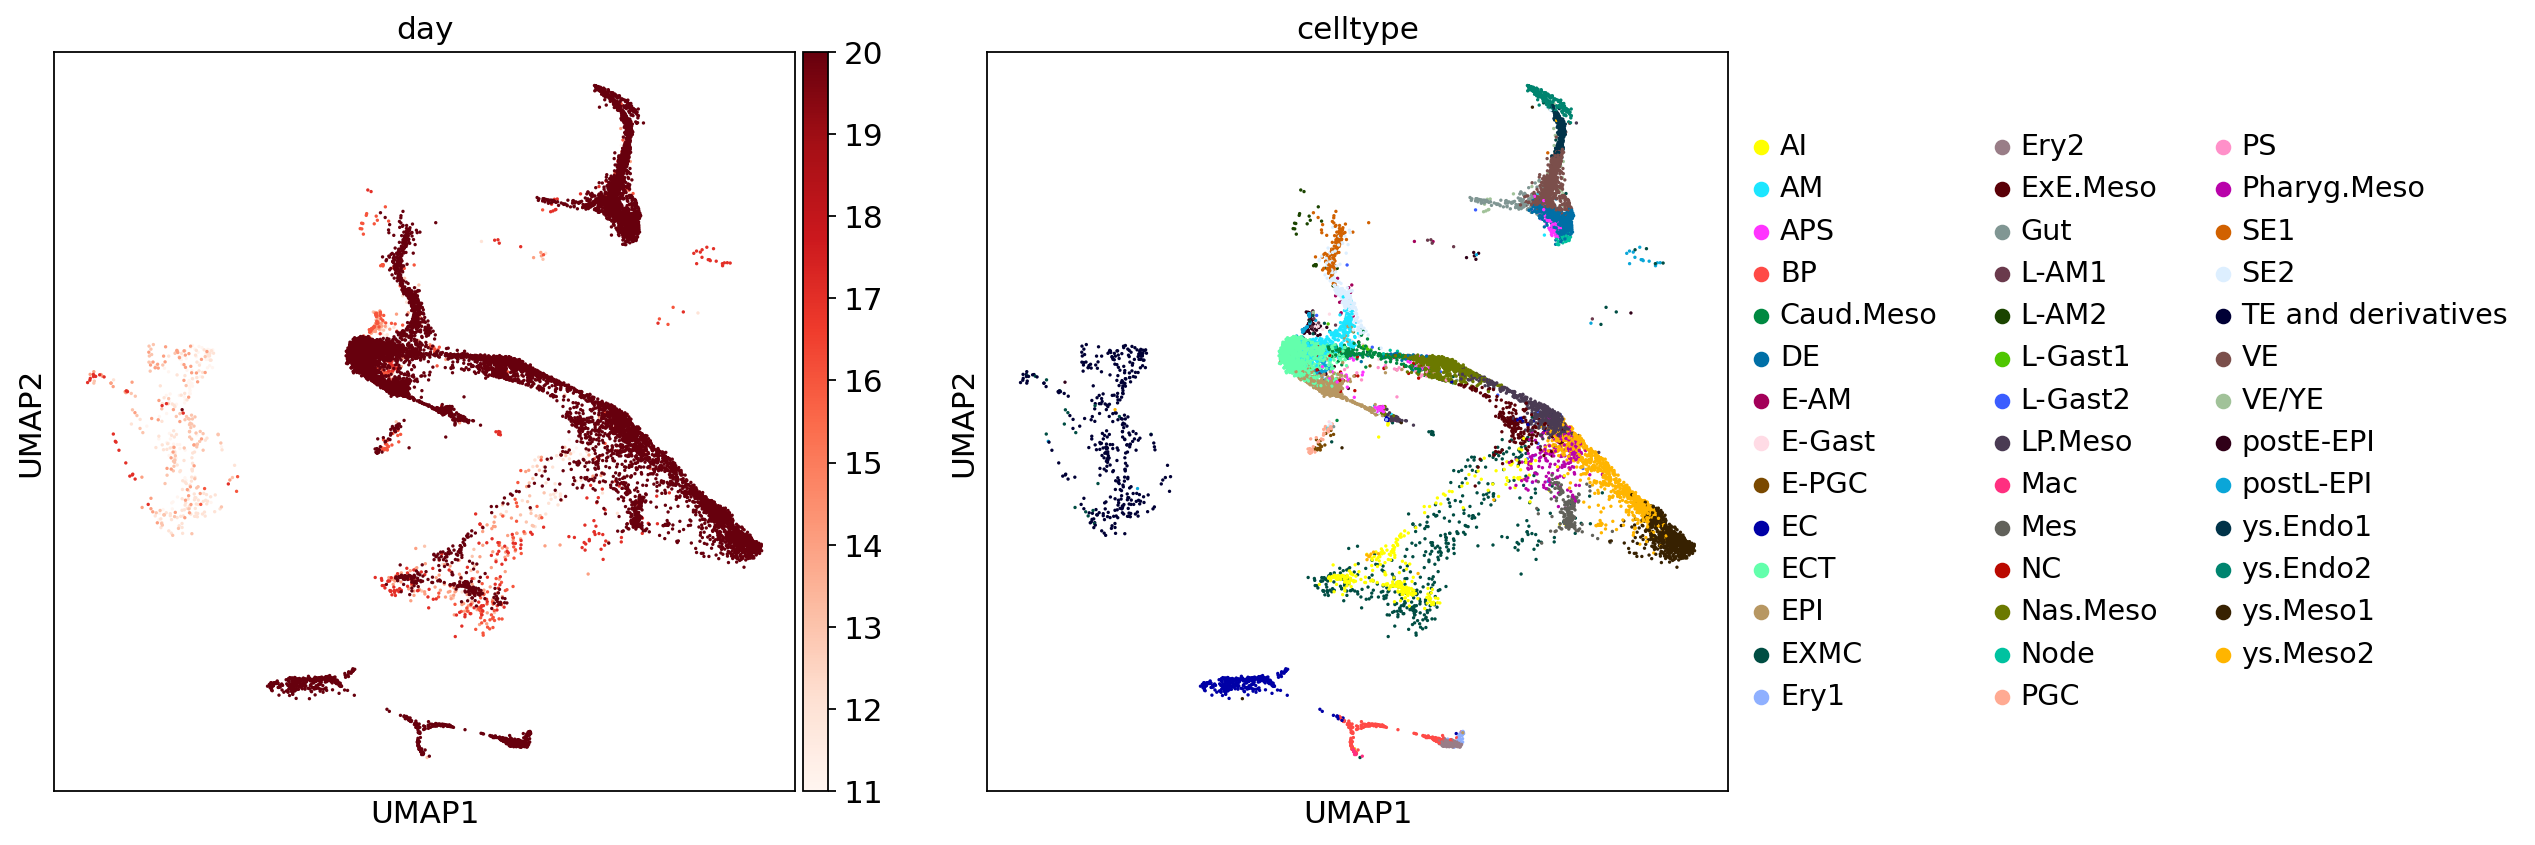

In [12]:
sc.pl.umap(adata, color=['day', 'celltype'])

In [13]:
adata.layers['counts'] = adata.raw.X

In [14]:
adata.X = adata.layers['counts']

In [16]:
adata_blood = adata[adata.obs['celltype'].isin(['Ery1', 'Ery2', 
                                                'EXM', 'EXMC', 'ExE.Meso', 
                                                'Nas.Meso', 'Mes', 'LP.Meso', 
                                                'VE', 'VE/YE', 'ys.Endo1', 'ys.Endo2', 
                                               'ys.Meso1', 'ys.Meso2'])]

In [17]:
adata_blood.obs['CellType_v2'] = adata_blood.obs['celltype']

adata_blood.obs['CellType_v2'] = adata_blood.obs['CellType_v2'].replace(['EXM', 'ExE.Meso', 'EXMC', 'LP.Meso'], 'ExM')
adata_blood.obs['CellType_v2'] = adata_blood.obs['CellType_v2'].replace(['Nas.Meso', 'Mes'], 'Mes')
adata_blood.obs['CellType_v2'] = adata_blood.obs['CellType_v2'].replace(['VE', 'VE/YE'], 'VE/YE')
adata_blood.obs['CellType_v2'] = adata_blood.obs['CellType_v2'].replace(['ys.Endo1', 'ys.Endo2'], 'YSE')
adata_blood.obs['CellType_v2'] = adata_blood.obs['CellType_v2'].replace(['ys.Meso1', 'ys.Meso2'], 'YSM')
adata_blood.obs['CellType_v2'] = adata_blood.obs['CellType_v2'].replace(['Ery1', 'Ery2'], 'Ery')

/tmp/ipykernel_961820/491231758.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_blood.obs['CellType_v2'] = adata_blood.obs['celltype']


In [18]:
del adata_blood.obsm['X_harmony']
del adata_blood.obsm['X_pca']
del adata_blood.obsm['X_umap']
del adata_blood.varm['PCs']

In [19]:
adata_blood.var = adata_blood.var[['var.features', 'var.features.rank']]

In [21]:
adata_blood = adata_blood[:, ~adata_blood.var_names.str.startswith('LOC')].copy()

In [22]:
adata_blood

AnnData object with n_obs × n_vars = 6144 × 26655
    obs: 'Batch', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'Stage', 'Species', 'Day', 'day', 'CellType_v2'
    var: 'var.features', 'var.features.rank'
    uns: 'celltype_colors'
    layers: 'counts'

In [23]:
adata_blood.write_h5ad('/mnt/yiming/nfs_share/hema_wave/monkey-embryo-d11-20-blood-uncorrected.h5ad')

In [43]:
adata = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/monkey-embryo-d11-20-blood-uncorrected.h5ad')

In [ ]:
adata_cs8 = adata[adata.obs['Stage']=='CS8']
adata_d11_17 = adata[~adata.obs['Stage'].isin(['CS8'])]

sc.pp.subsample(adata_cs8, n_obs=1200)

adata = sc.concat([adata_cs8, adata_d11_17])

In [ ]:
adata.write_h5ad('/mnt/yiming/nfs_share/hema_wave/monkey-embryo-d11-20-ds-blood-uncorrected.h5ad')

## mnn

cs8 downsampling to 1.2k

In [1]:
!pip install gseapy

  Obtaining dependency information for gseapy from https://files.pythonhosted.org/packages/78/ee/0638247bd7ac975887db0d743b5f7a092f1cc12a4daa1255c20577ce2e8c/gseapy-1.1.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 12.1 MB/s eta 0:00:00a 0:00:01


In [2]:
import gseapy as gp

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80,dpi_save=100,color_map='Reds')
sc.logging.print_version_and_date()

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
plt.show()
matplotlib.rcParams.update({'figure.figsize': (6,6)})

Running Scanpy 1.10.3, on 2025-04-08 03:55.


In [3]:
seed = 64

In [4]:
adata = sc.read_h5ad('/mnt/yiming/nfs_share/hema_wave/monkey-embryo-d11-20-ds-blood-uncorrected.h5ad')
r_pcs = pd.read_csv("/mnt/yiming/nfs_share/hema_wave/monkey-embryo-d11-20-ds-blood-uncorrected_pcs-v1.tsv", sep="\t")
adata.obsm["X_pca"] = np.array(r_pcs)

In [5]:
adata

AnnData object with n_obs × n_vars = 1786 × 26655
    obs: 'Batch', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'Stage', 'Species', 'Day', 'day', 'CellType_v2'
    obsm: 'X_pca'
    layers: 'counts'

In [6]:
# Normalizing to median total counts
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [7]:
sc.pp.highly_variable_genes(adata)
sc.pp.scale(adata)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [8]:
# use X_pca for UMAP generation
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=15, use_rep="X_pca")
sc.tl.umap(adata, min_dist=0.1)

computing neighbors


/mnt/yiming/nfs_share/anaconda3/envs/scanpy/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


In [8]:
# # use X_pca for UMAP generation
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50


/mnt/yiming/nfs_share/anaconda3/envs/scanpy/lib/python3.11/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:04)


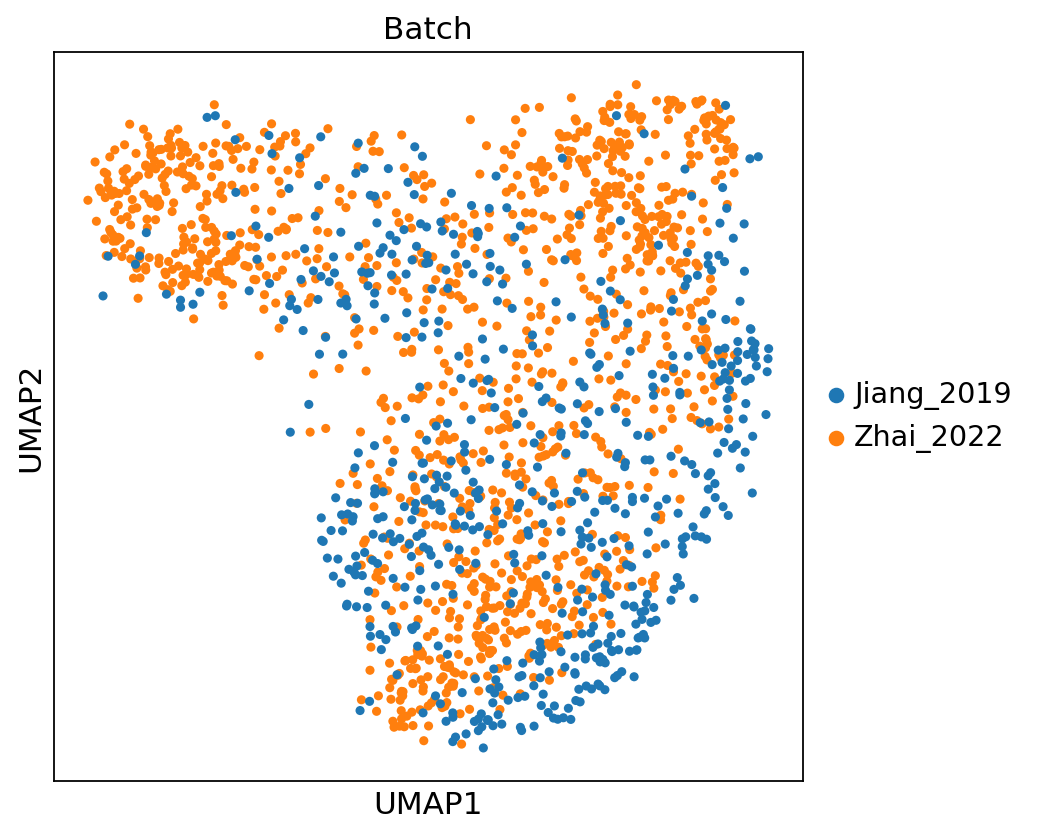

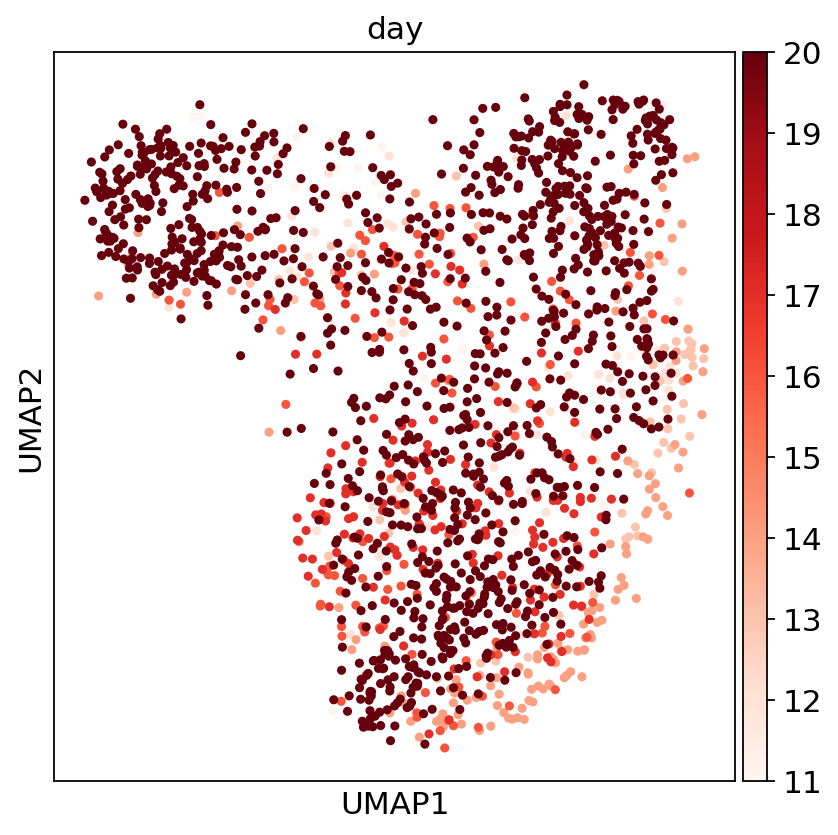

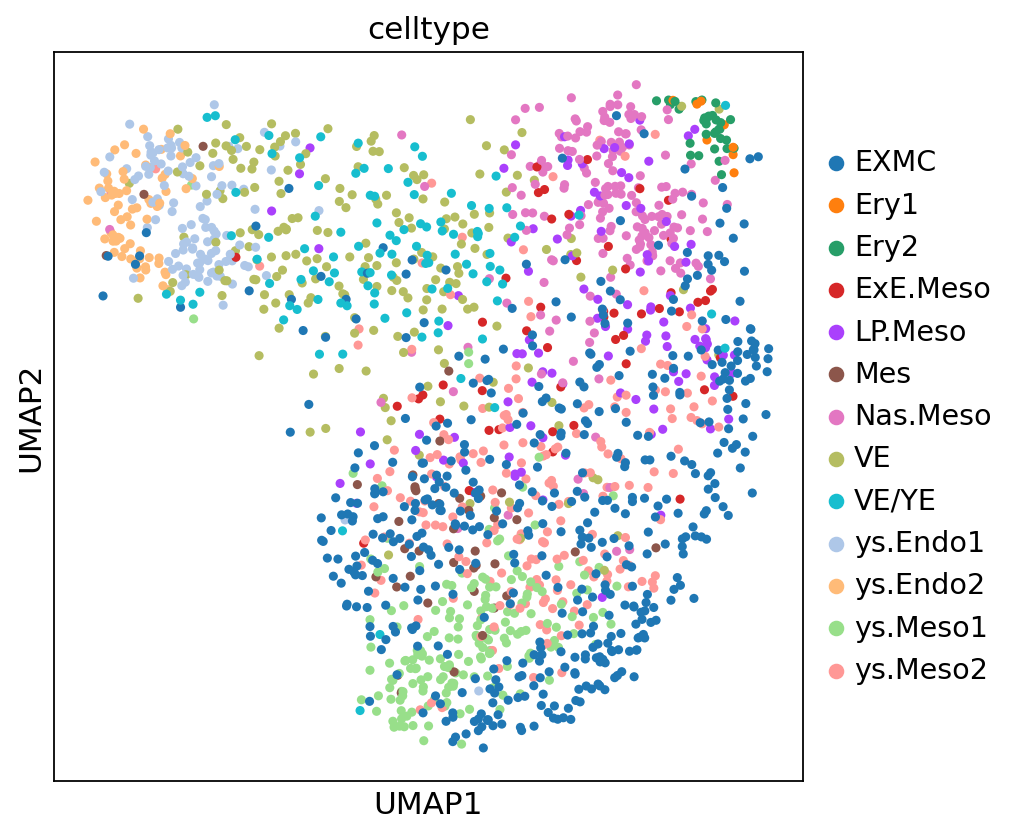

In [11]:
sc.pl.umap(adata,color=['Batch'])
sc.pl.umap(adata,color=['day'])
sc.pl.umap(adata,color=['celltype'])

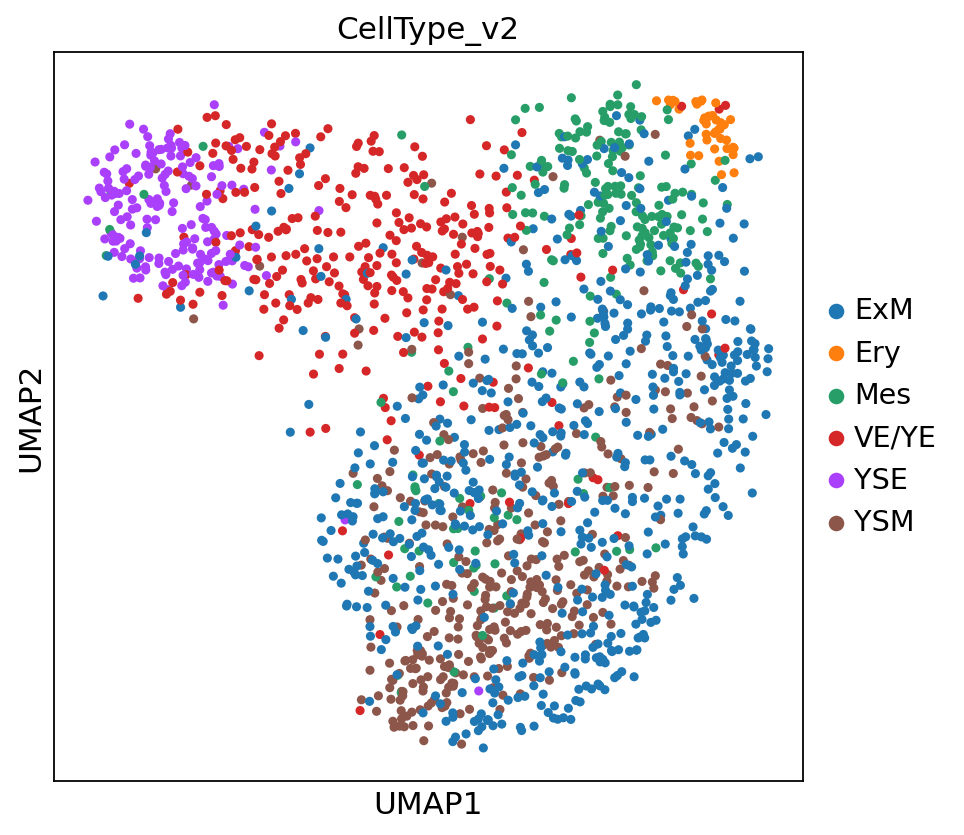

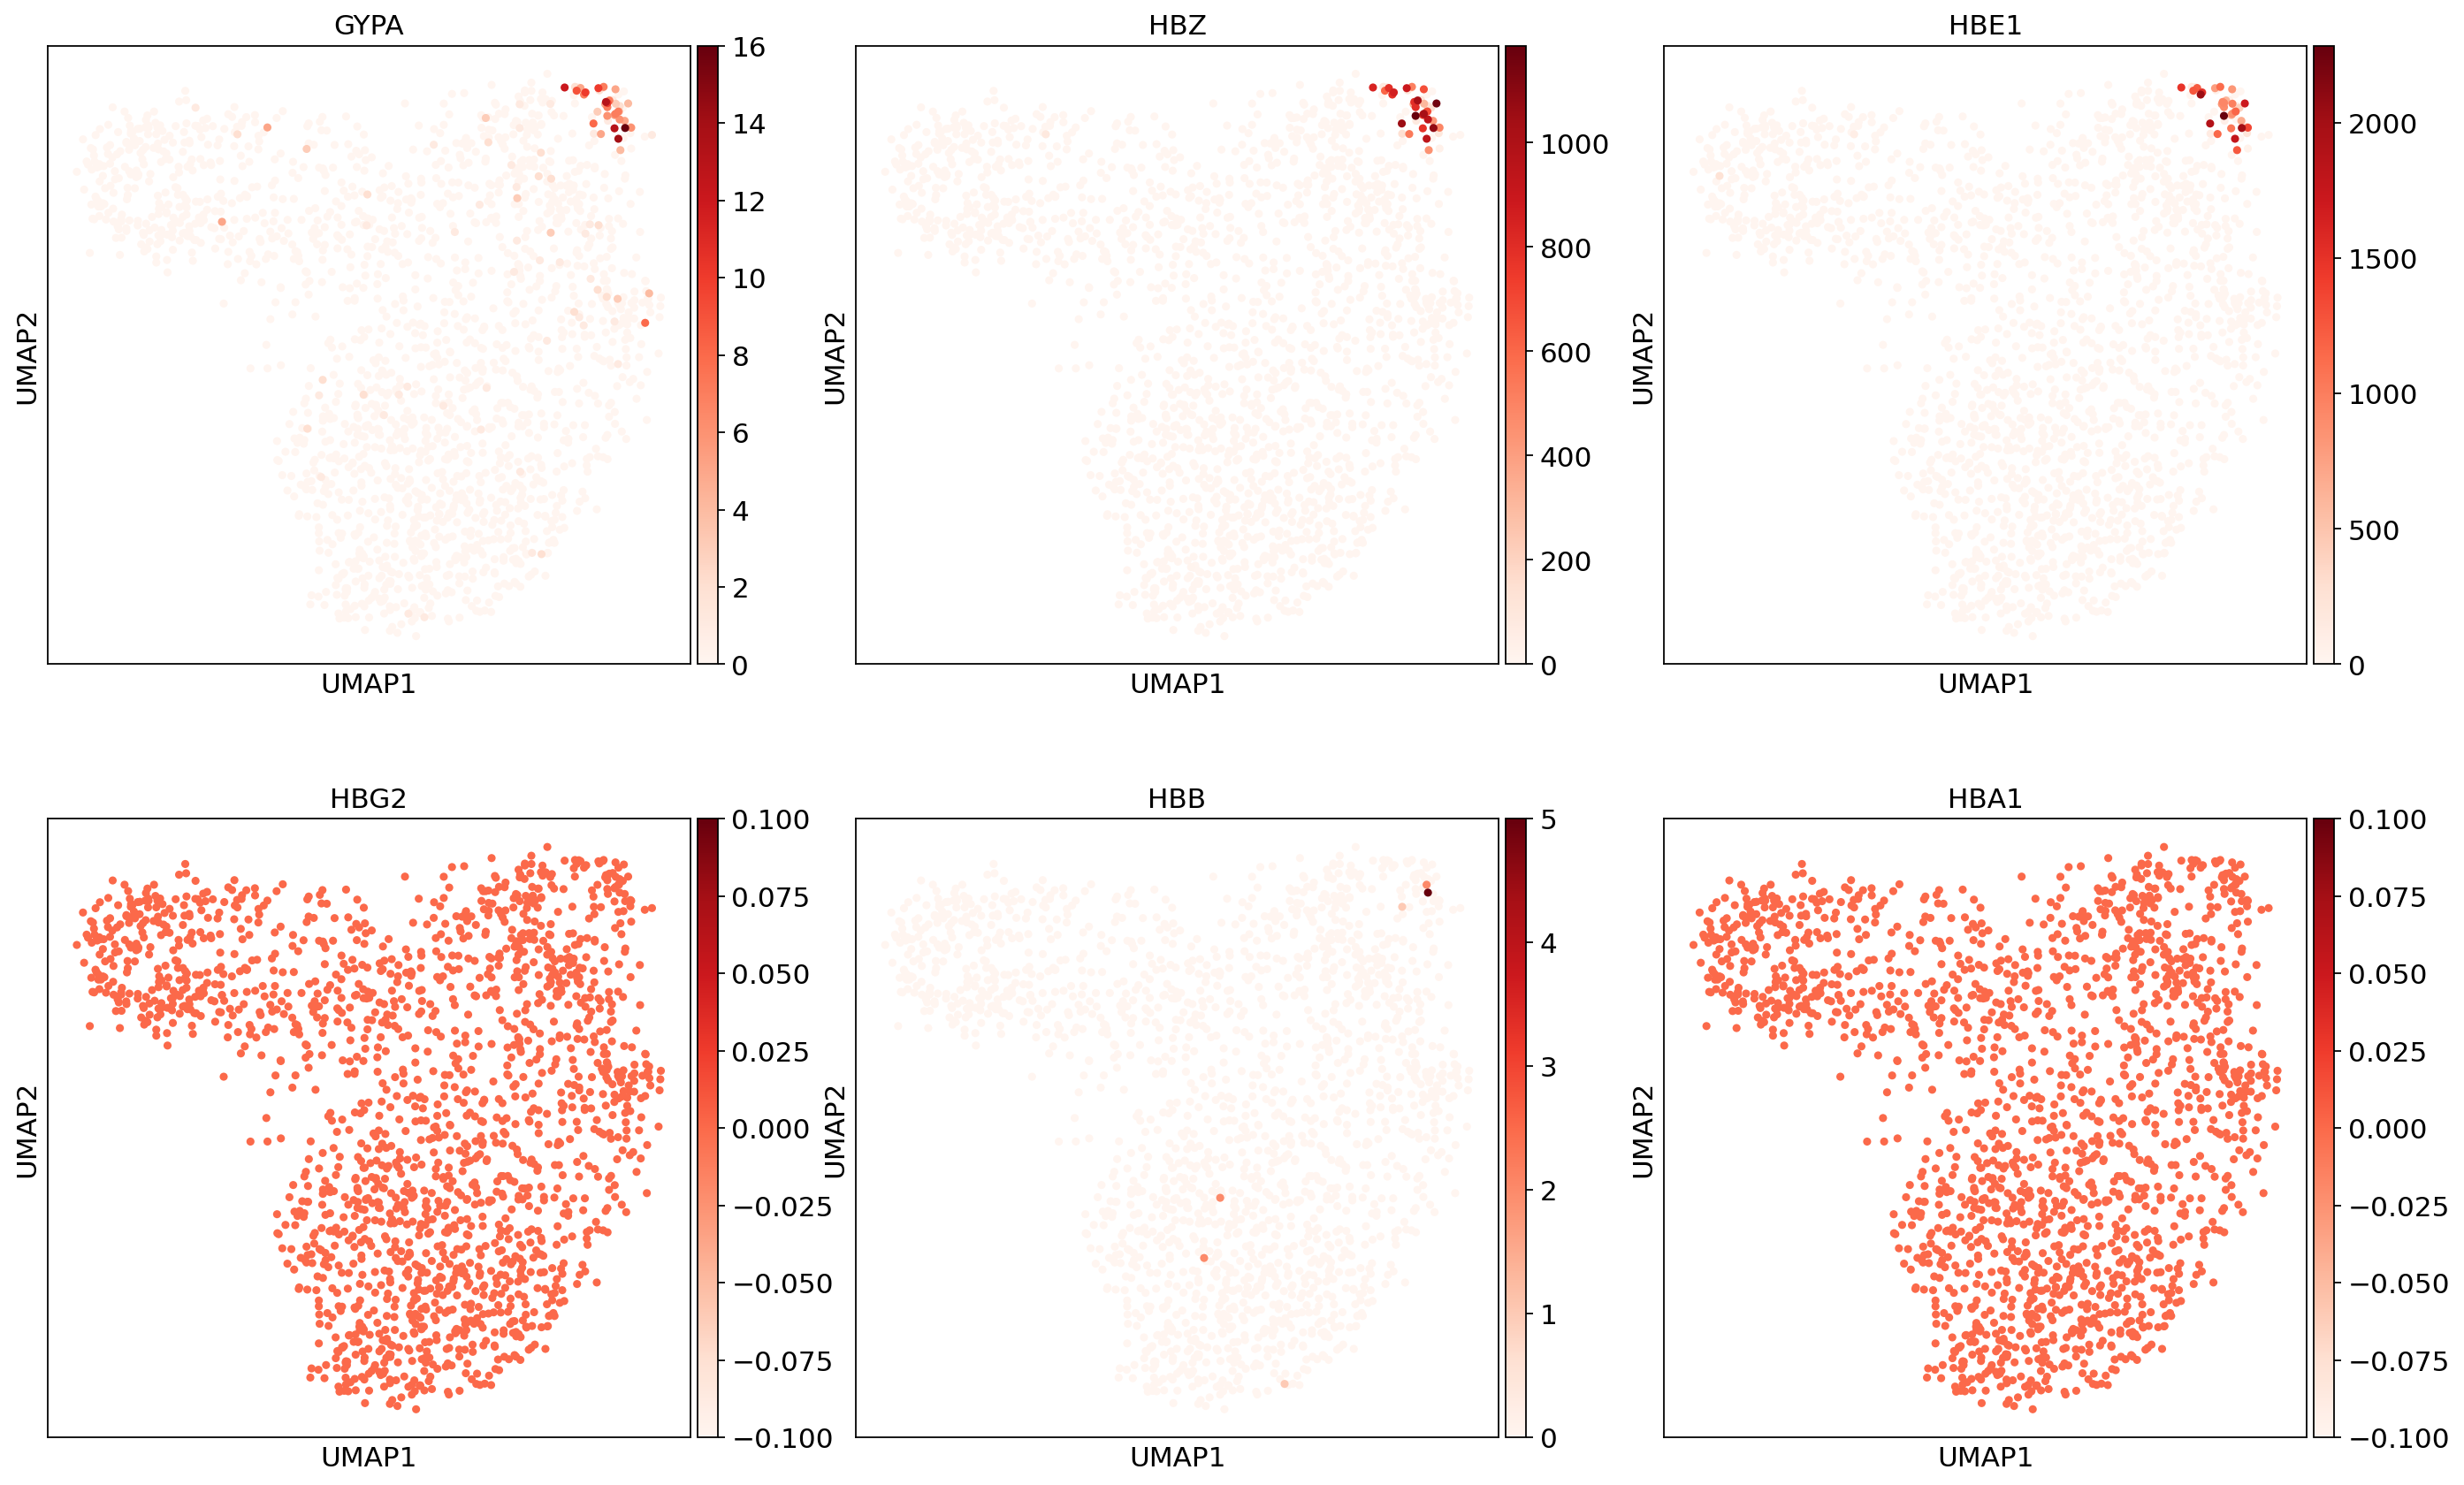

In [12]:
sc.pl.umap(adata, color=['CellType_v2'])
sc.pl.umap(adata, color=['GYPA', 'HBZ', 'HBE1', 'HBG2', 'HBB', 'HBA1'], ncols=3)

In [15]:
adata.obs

Batch  nCount_RNA  nFeature_RNA  celltype     Stage  \
ATCATTCCAATAACCC-2   Zhai_2022     24983.0          4320  ys.Endo2       CS8   
GCATCGGGTACACGCC-2   Zhai_2022     12893.0          3085  ys.Endo2       CS8   
ATGCATGAGTAAAGCT-1   Zhai_2022      1760.0           983  Nas.Meso       CS8   
ACATCGAAGTGATCGG-2   Zhai_2022      3135.0          1514       Mes       CS8   
TGTTTGTCAAGTTTGC-1   Zhai_2022     15449.0          3916   LP.Meso       CS8   
...                        ...         ...           ...       ...       ...   
MFI173_sc90         Jiang_2019     19130.0          4432      EXMC  d.p.f.17   
MFI173_sc91         Jiang_2019     99235.0          7748      EXMC  d.p.f.17   
MFI173_sc92         Jiang_2019    212488.0          6961      EXMC  d.p.f.17   
MFI173_sc93         Jiang_2019    260799.0          9062      EXMC  d.p.f.17   
MFI173_sc96         Jiang_2019     15239.0          4303      EXMC  d.p.f.17   

                                Species  Day  day CellType_v2  
ATCATTCCAATAACCC-2  Macaca fascicularis  D20   20         YSE  
GCATCGGGTACACGCC-2  Macaca fascicularis  D20   20         YSE  
ATGCATGAGTAAAGCT-1  Macaca fascicularis  D20   20         Mes  
ACATCGAAGTGATCGG-2  Macaca fascicularis  D20   20         Mes  
TGTTTGTCAAGTTTGC-1  Macaca fascicularis  D20   20         ExM  
...                                 ...  ...  ...         ...  
MFI173_sc90         Macaca fascicularis  D17   17         ExM  
MFI173_sc91         Macaca fascicularis  D17   17         ExM  
MFI173_sc92         Macaca fascicularis  D17   17         ExM  
MFI173_sc93         Macaca fascicularis  D17   17         ExM  
MFI173_sc96         Macaca fascicularis  D17   17         ExM  

[1786 rows x 9 columns]

In [11]:
adata.write_h5ad('/mnt/yiming/nfs_share/hema_wave/monkey-embryo-d11-20-ds-blood-mnn-corrected.h5ad')

# check adata

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80,dpi_save=100,color_map='Reds')
sc.logging.print_version_and_date()

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
plt.show()
matplotlib.rcParams.update({'figure.figsize': (6,6)})

Running Scanpy 1.10.3, on 2025-06-10 08:58.


In [3]:
from datetime import datetime

# Generate timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

In [4]:
adata = sc.read_h5ad('monkey-embryo-d11-20-ds-blood-mnn-corrected.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 1786 × 26655
    obs: 'Batch', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'Stage', 'Species', 'Day', 'day', 'CellType_v2'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Batch_colors', 'CellType_v2_colors', 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
marker_genes_dict = {
    "Embryonic": ['HBZ', 'HBE1'],
    "Fetal": [ 'HBG2'],
    "Adult":['HBB']
}

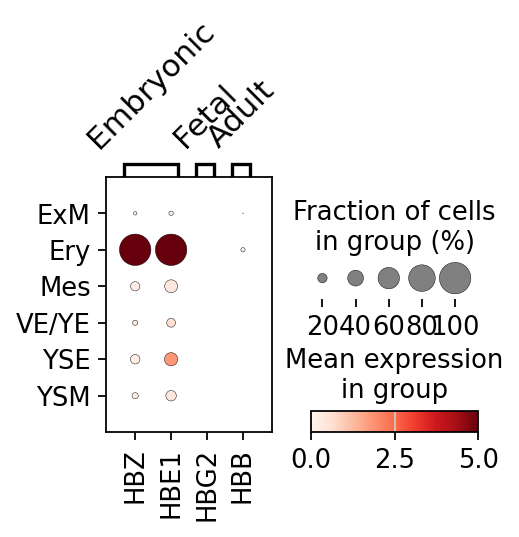

In [6]:
sc.pl.dotplot(adata, marker_genes_dict, 'CellType_v2', vmax=5, var_group_rotation=45)

In [9]:
adata.obs['EmbryoStage'] = adata.obs['Day']
adata.obs['EmbryoStage'] = adata.obs['EmbryoStage'].replace('D20', 'CS8')

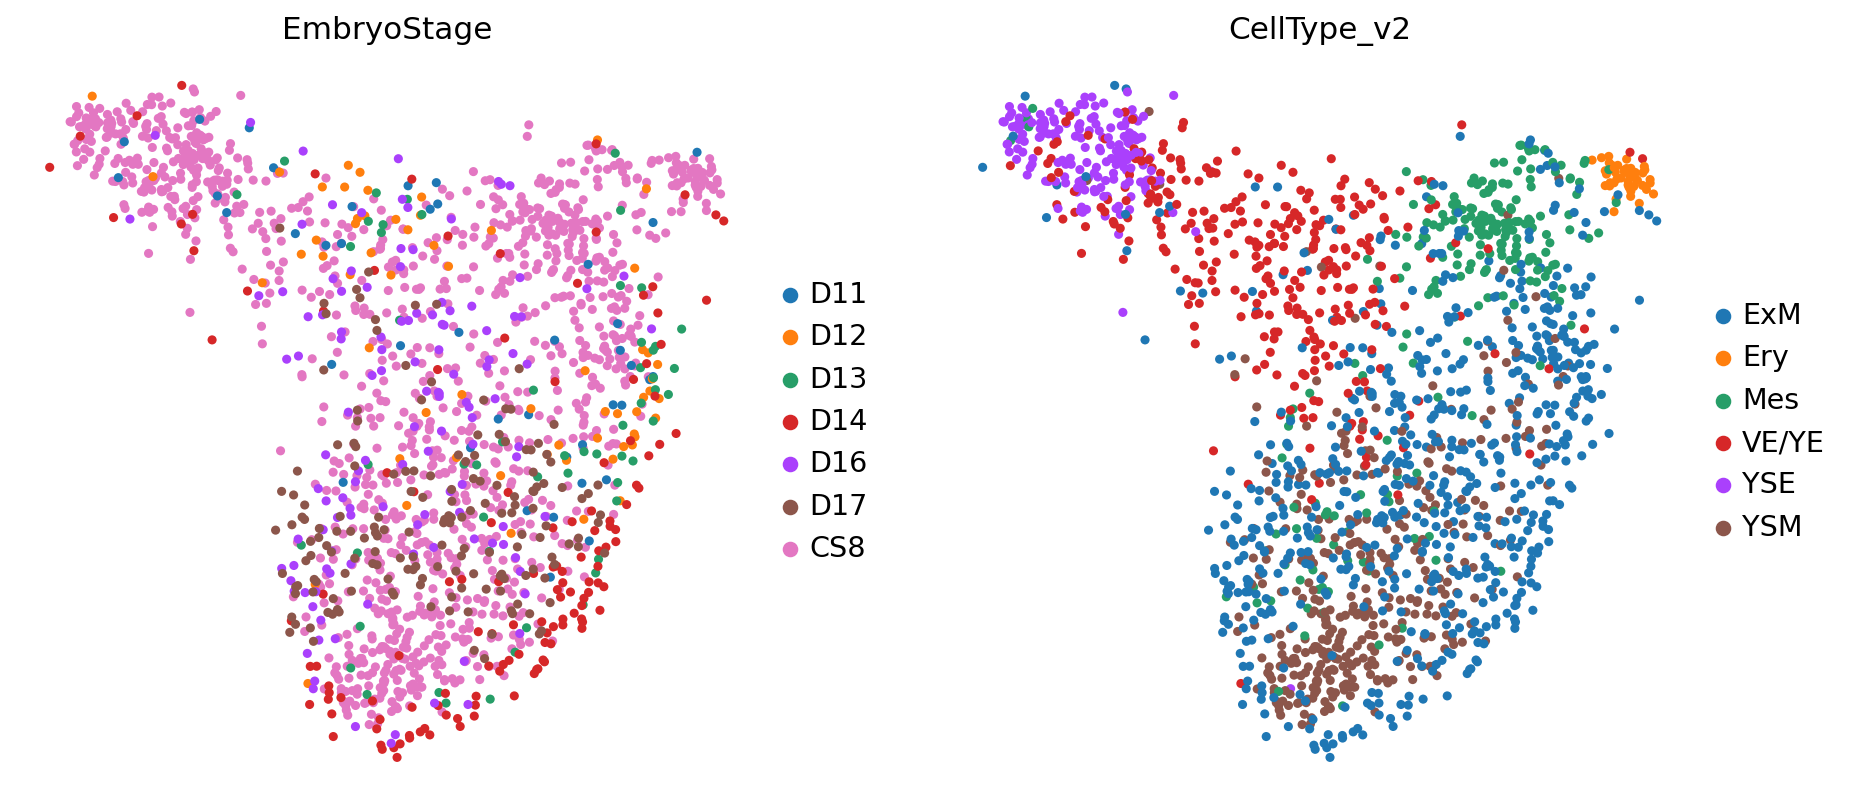

In [19]:
sc.pl.umap(adata, color=['EmbryoStage', 'CellType_v2'], frameon=False)

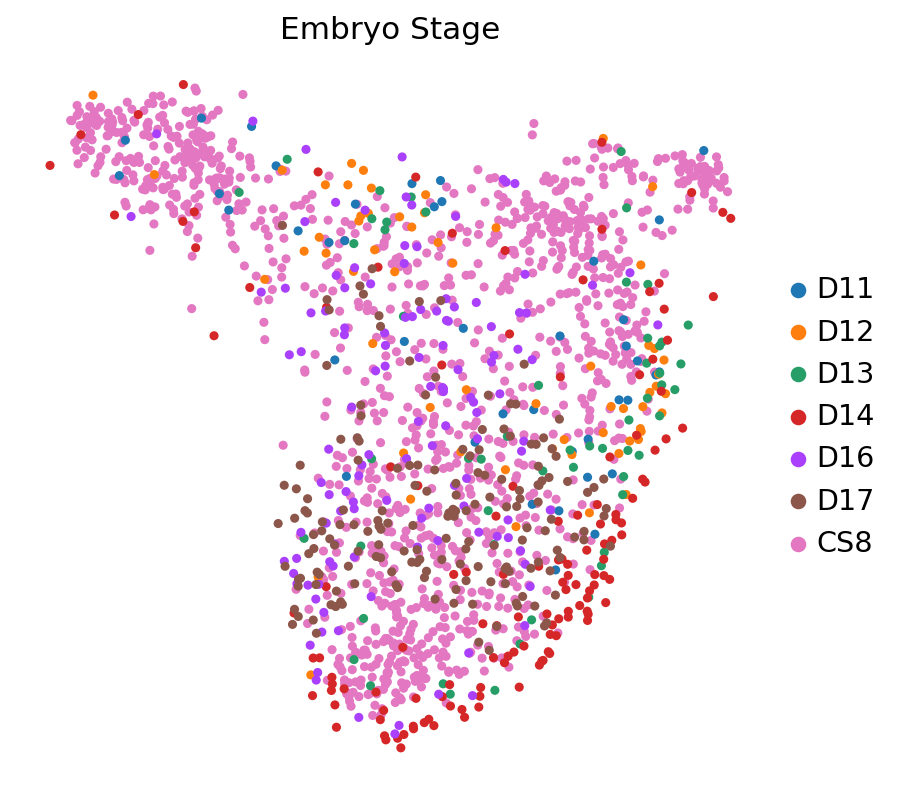

In [10]:
p = sc.pl.umap(
    adata, 
    color=['EmbryoStage'], 
    frameon=False,
    # show=False,  # Don't display immediately
    return_fig=True,  # Return figure object for more control
    title='Embryo Stage'
)

png_filename = f"figures/umap_monkey_embryox7_embryostage{timestamp}_dpi600.png"
p.savefig(
    png_filename,
    dpi=600,
    bbox_inches='tight',
    facecolor='white'
)

In [12]:
adata

AnnData object with n_obs × n_vars = 1786 × 26655
    obs: 'Batch', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'Stage', 'Species', 'Day', 'day', 'CellType_v2', 'EmbryoStage'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Batch_colors', 'CellType_v2_colors', 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'umap', 'EmbryoStage_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

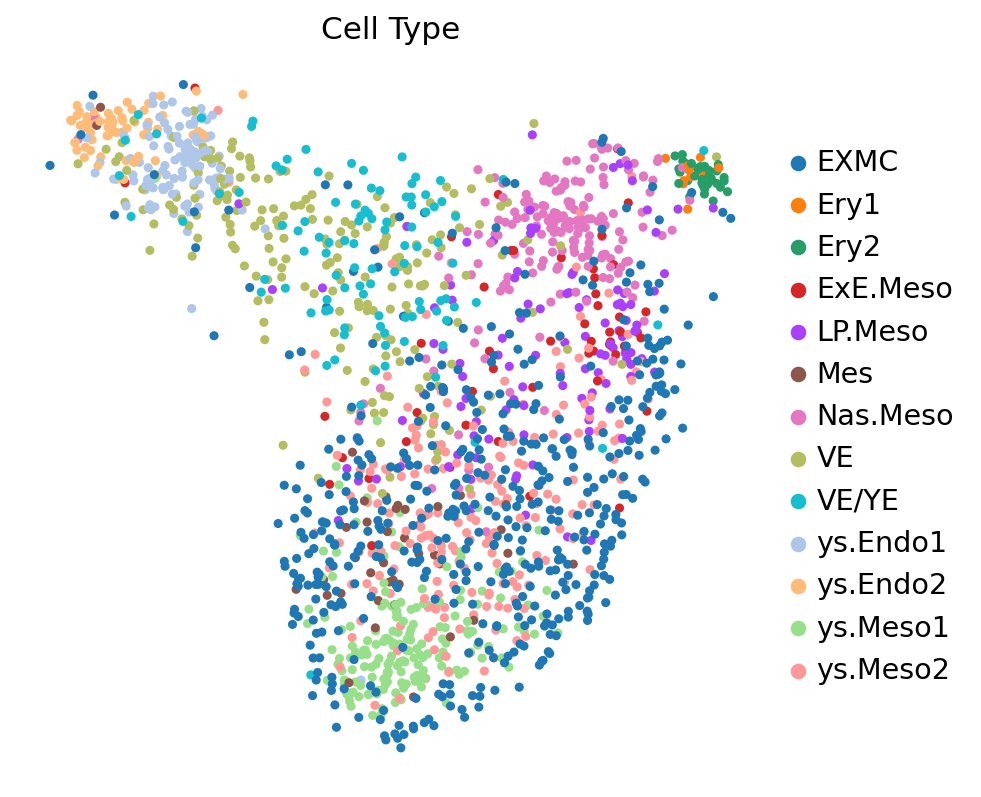

In [13]:
p = sc.pl.umap(
    adata, 
    color=['celltype'], 
    frameon=False,
    # show=False,  # Don't display immediately
    return_fig=True,  # Return figure object for more control
    title='Cell Type'
)

png_filename = f"figures/umap_monkey_embryox7_fullcelltype{timestamp}_dpi600.png"
p.savefig(
    png_filename,
    dpi=600,
    bbox_inches='tight',
    facecolor='white'
)

computing score 'XEN'
    finished: added
    'XEN', score of gene set (adata.obs).
    299 total control genes are used. (0:00:00)


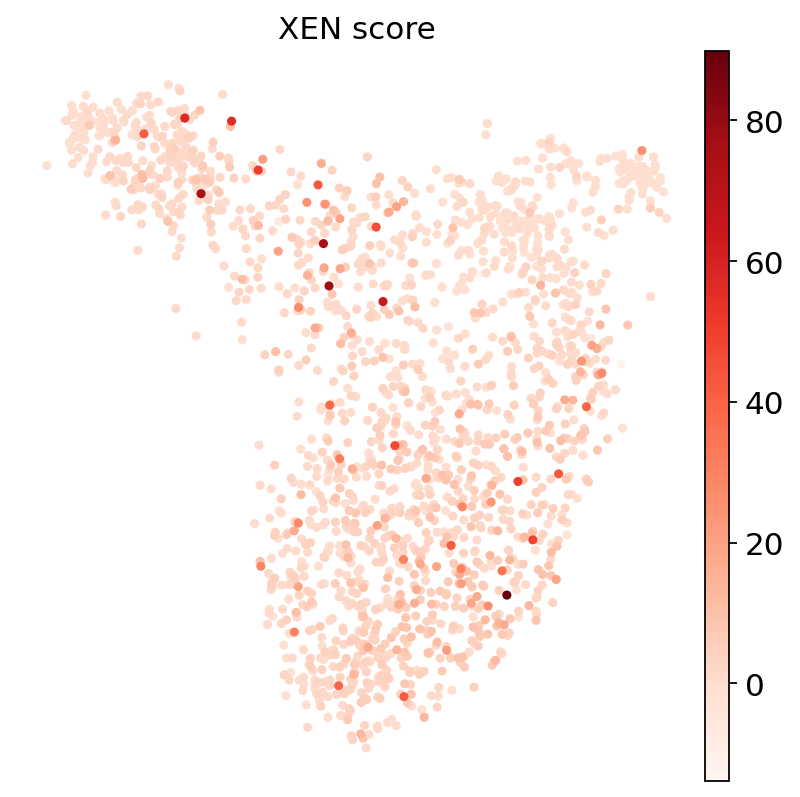

In [14]:
xen_gene = ['DAB2', 'FOXA2', 'FOXQ1', 'FST', 'FXYD3', 'GATA4', 'GATA6', 
            'KRT8', 'LAMA1', 'LAMB1', 'PDGFRA', 'PTH1R', 'SOX17', 'TET3']

sc.tl.score_genes(adata, xen_gene, score_name='XEN')

p = sc.pl.umap(
    adata, 
    color=['XEN'], 
    frameon=False,
    # show=False,  # Don't display immediately
    return_fig=True,  # Return figure object for more control
    title='XEN score'
)

png_filename = f"figures/umap_monkey_embryox7_xenscore{timestamp}_dpi600.png"
p.savefig(
    png_filename,
    dpi=600,
    bbox_inches='tight',
    facecolor='white'
)

/tmp/ipykernel_2450698/414247278.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


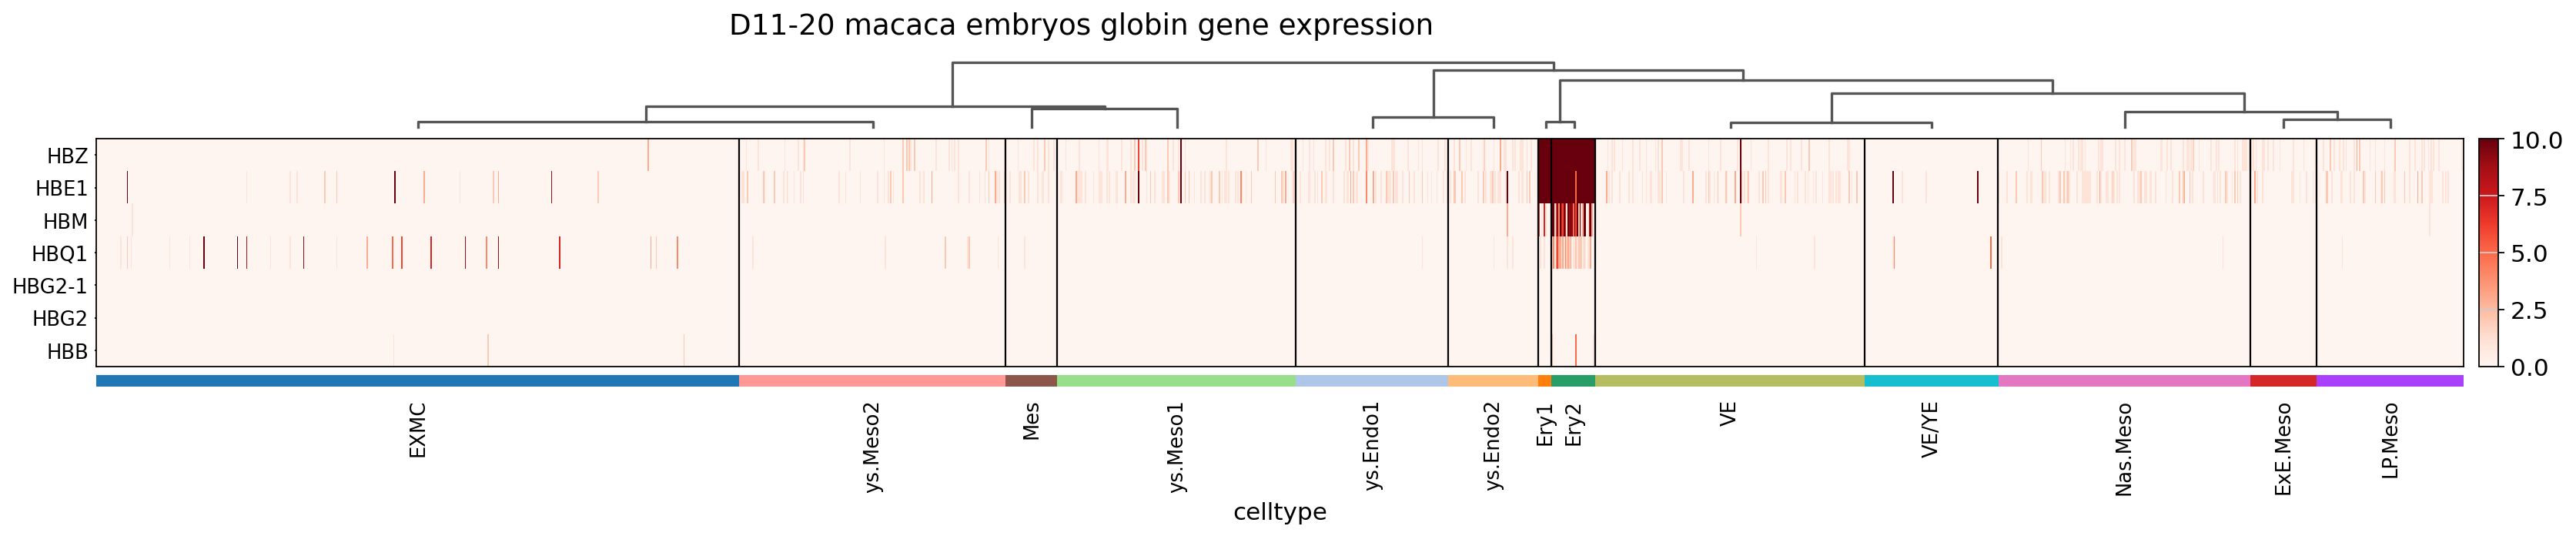

In [26]:
sc.pl.heatmap(
    adata,
    var_names=['HBZ', 'HBE1', 'HBM', 'HBQ1', 'HBG2-1', 'HBG2', 'HBB'],
    groupby='celltype',
    dendrogram=True,
    swap_axes=True,
    vmin=0,
    vmax=10,
    cmap='Reds',
    figsize=(25, 3.5),
    show=False  # Disable automatic show to add title manually
)

# Add title
plt.gcf().suptitle('D11-20 macaca embryos globin gene expression', y=1.02)
plt.tight_layout()

# Save as PNG
png_path = f'figures/heatmap_monkey_embryox7_globingene{timestamp}_dpi600.png'
plt.savefig(png_path, dpi=600, bbox_inches='tight')

/tmp/ipykernel_2450698/1502972201.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


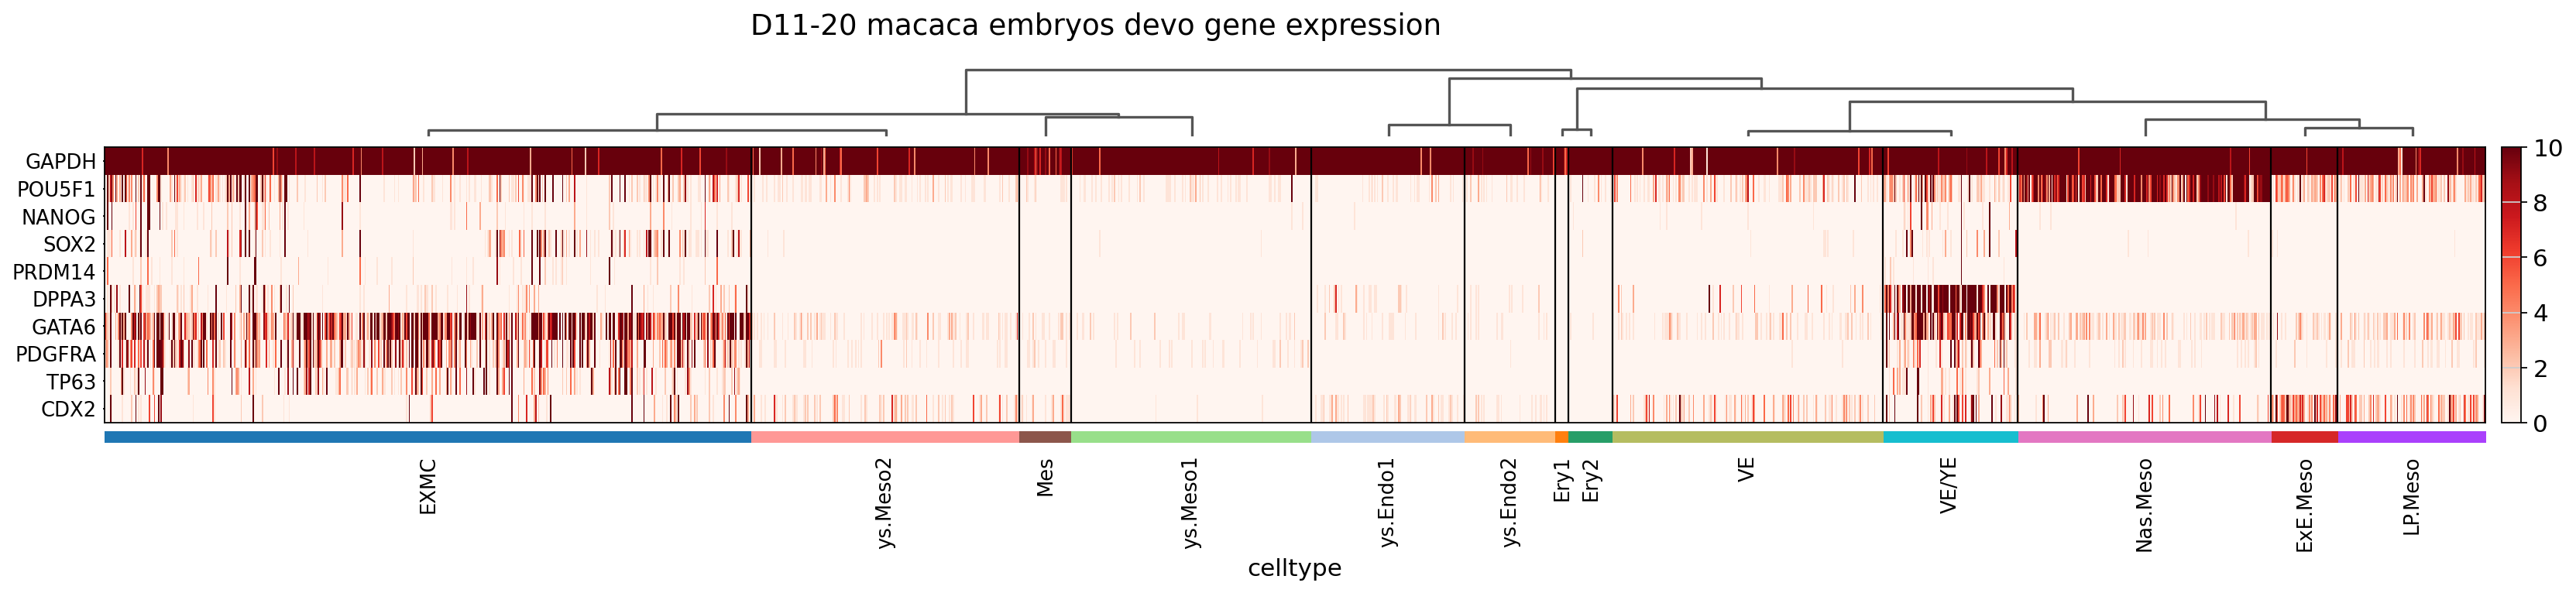

In [27]:
sc.pl.heatmap(
    adata,
    var_names=['GAPDH', 'POU5F1', 'NANOG', 'SOX2', 'PRDM14', 
    'DPPA3', 'GATA6', 'PDGFRA', 'TP63', 'CDX2'],
    groupby='celltype',
    dendrogram=True,
    swap_axes=True,
    vmin=0,
    vmax=10,
    cmap='Reds',
    figsize=(25, 4),
    show=False  # Disable automatic show to add title manually
)

# Add title
plt.gcf().suptitle('D11-20 macaca embryos devo gene expression', y=1.02)
plt.tight_layout()

# Save as PNG
png_path = f'figures/heatmap_monkey_embryox7_devgene{timestamp}_dpi600.png'
plt.savefig(png_path, dpi=600, bbox_inches='tight')

/tmp/ipykernel_2450698/3003558808.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


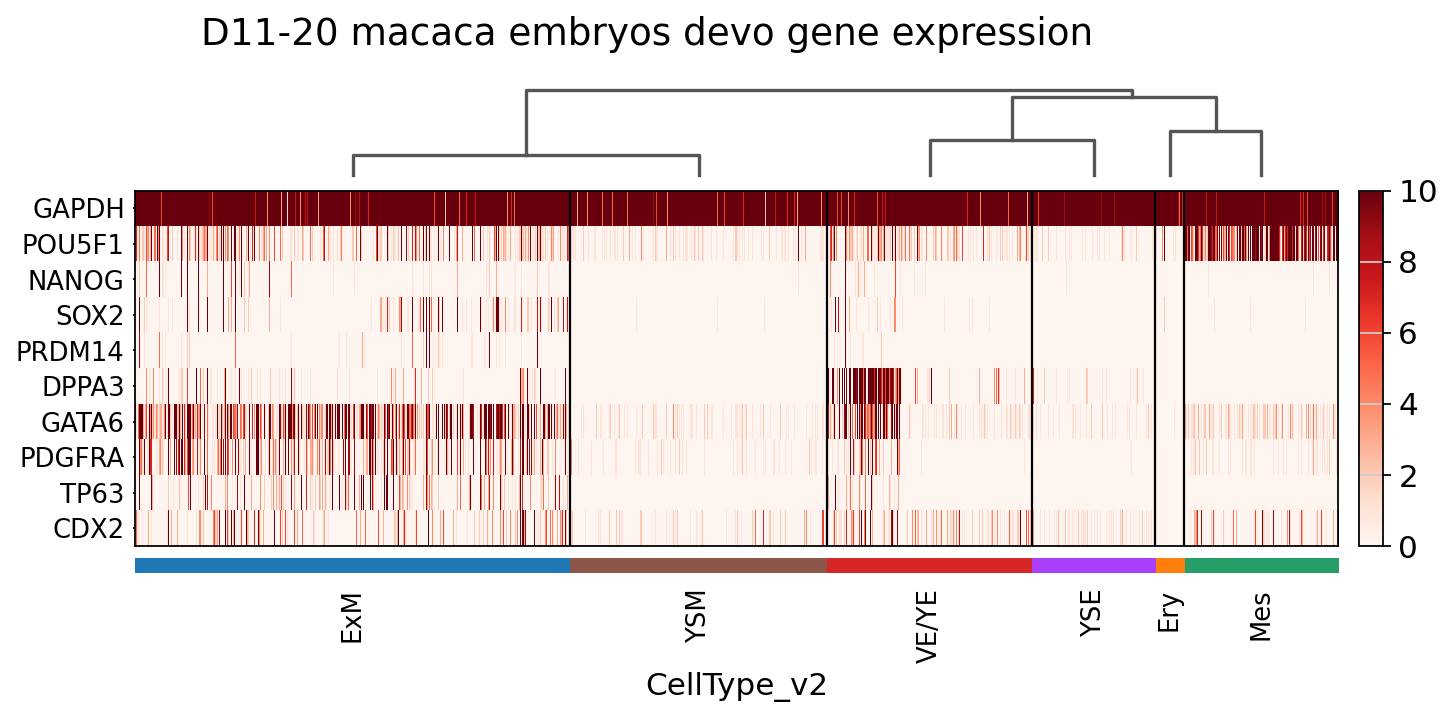

In [30]:
sc.pl.heatmap(
    adata,
    var_names=['GAPDH', 'POU5F1', 'NANOG', 'SOX2', 'PRDM14', 
    'DPPA3', 'GATA6', 'PDGFRA', 'TP63', 'CDX2'],
    groupby='CellType_v2',
    dendrogram=True,
    swap_axes=True,
    vmin=0,
    vmax=10,
    cmap='Reds',
    figsize=(10, 4),
    show=False  # Disable automatic show to add title manually
)

# Add title
plt.gcf().suptitle('D11-20 macaca embryos devo gene expression', y=1.02)
plt.tight_layout()

# Save as PNG
png_path = f'figures/heatmap_monkey_embryox7_devgene2{timestamp}_dpi600.png'
plt.savefig(png_path, dpi=600, bbox_inches='tight')

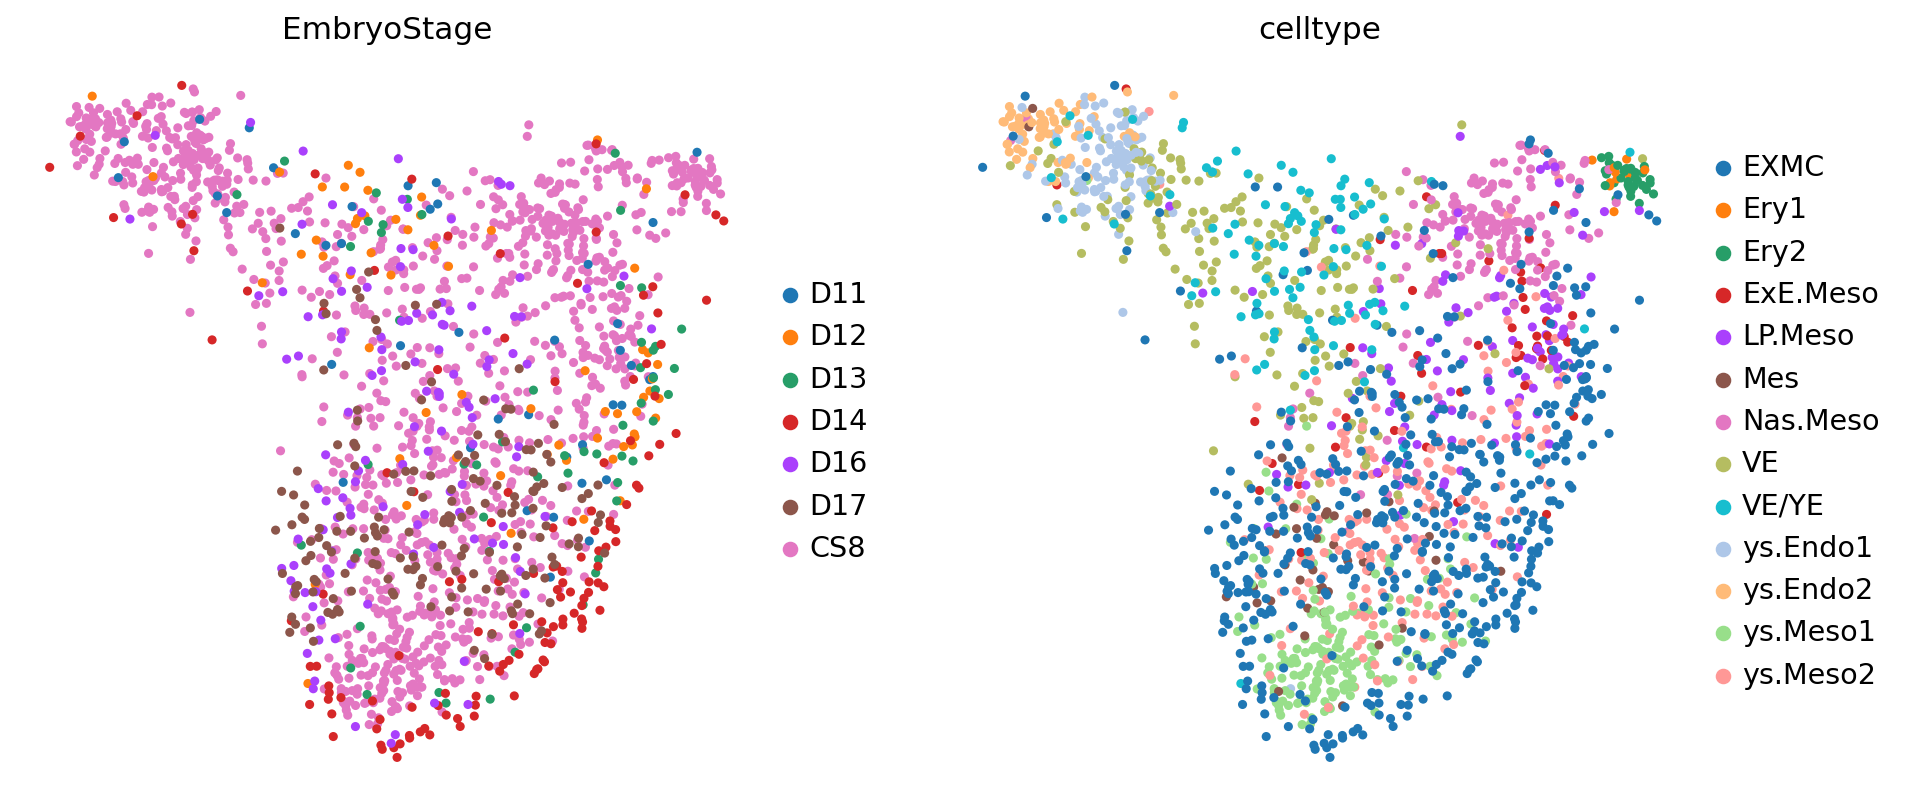

In [26]:
sc.pl.umap(adata, color=['EmbryoStage', 'celltype'], frameon=False)

In [9]:
adata

AnnData object with n_obs × n_vars = 1786 × 26655
    obs: 'Batch', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'Stage', 'Species', 'Day', 'day', 'CellType_v2'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Batch_colors', 'CellType_v2_colors', 'celltype_colors', 'hvg', 'log1p', 'neighbors', 'umap', 'dendrogram_CellType_v2'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/tmp/ipykernel_1392260/1741412824.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


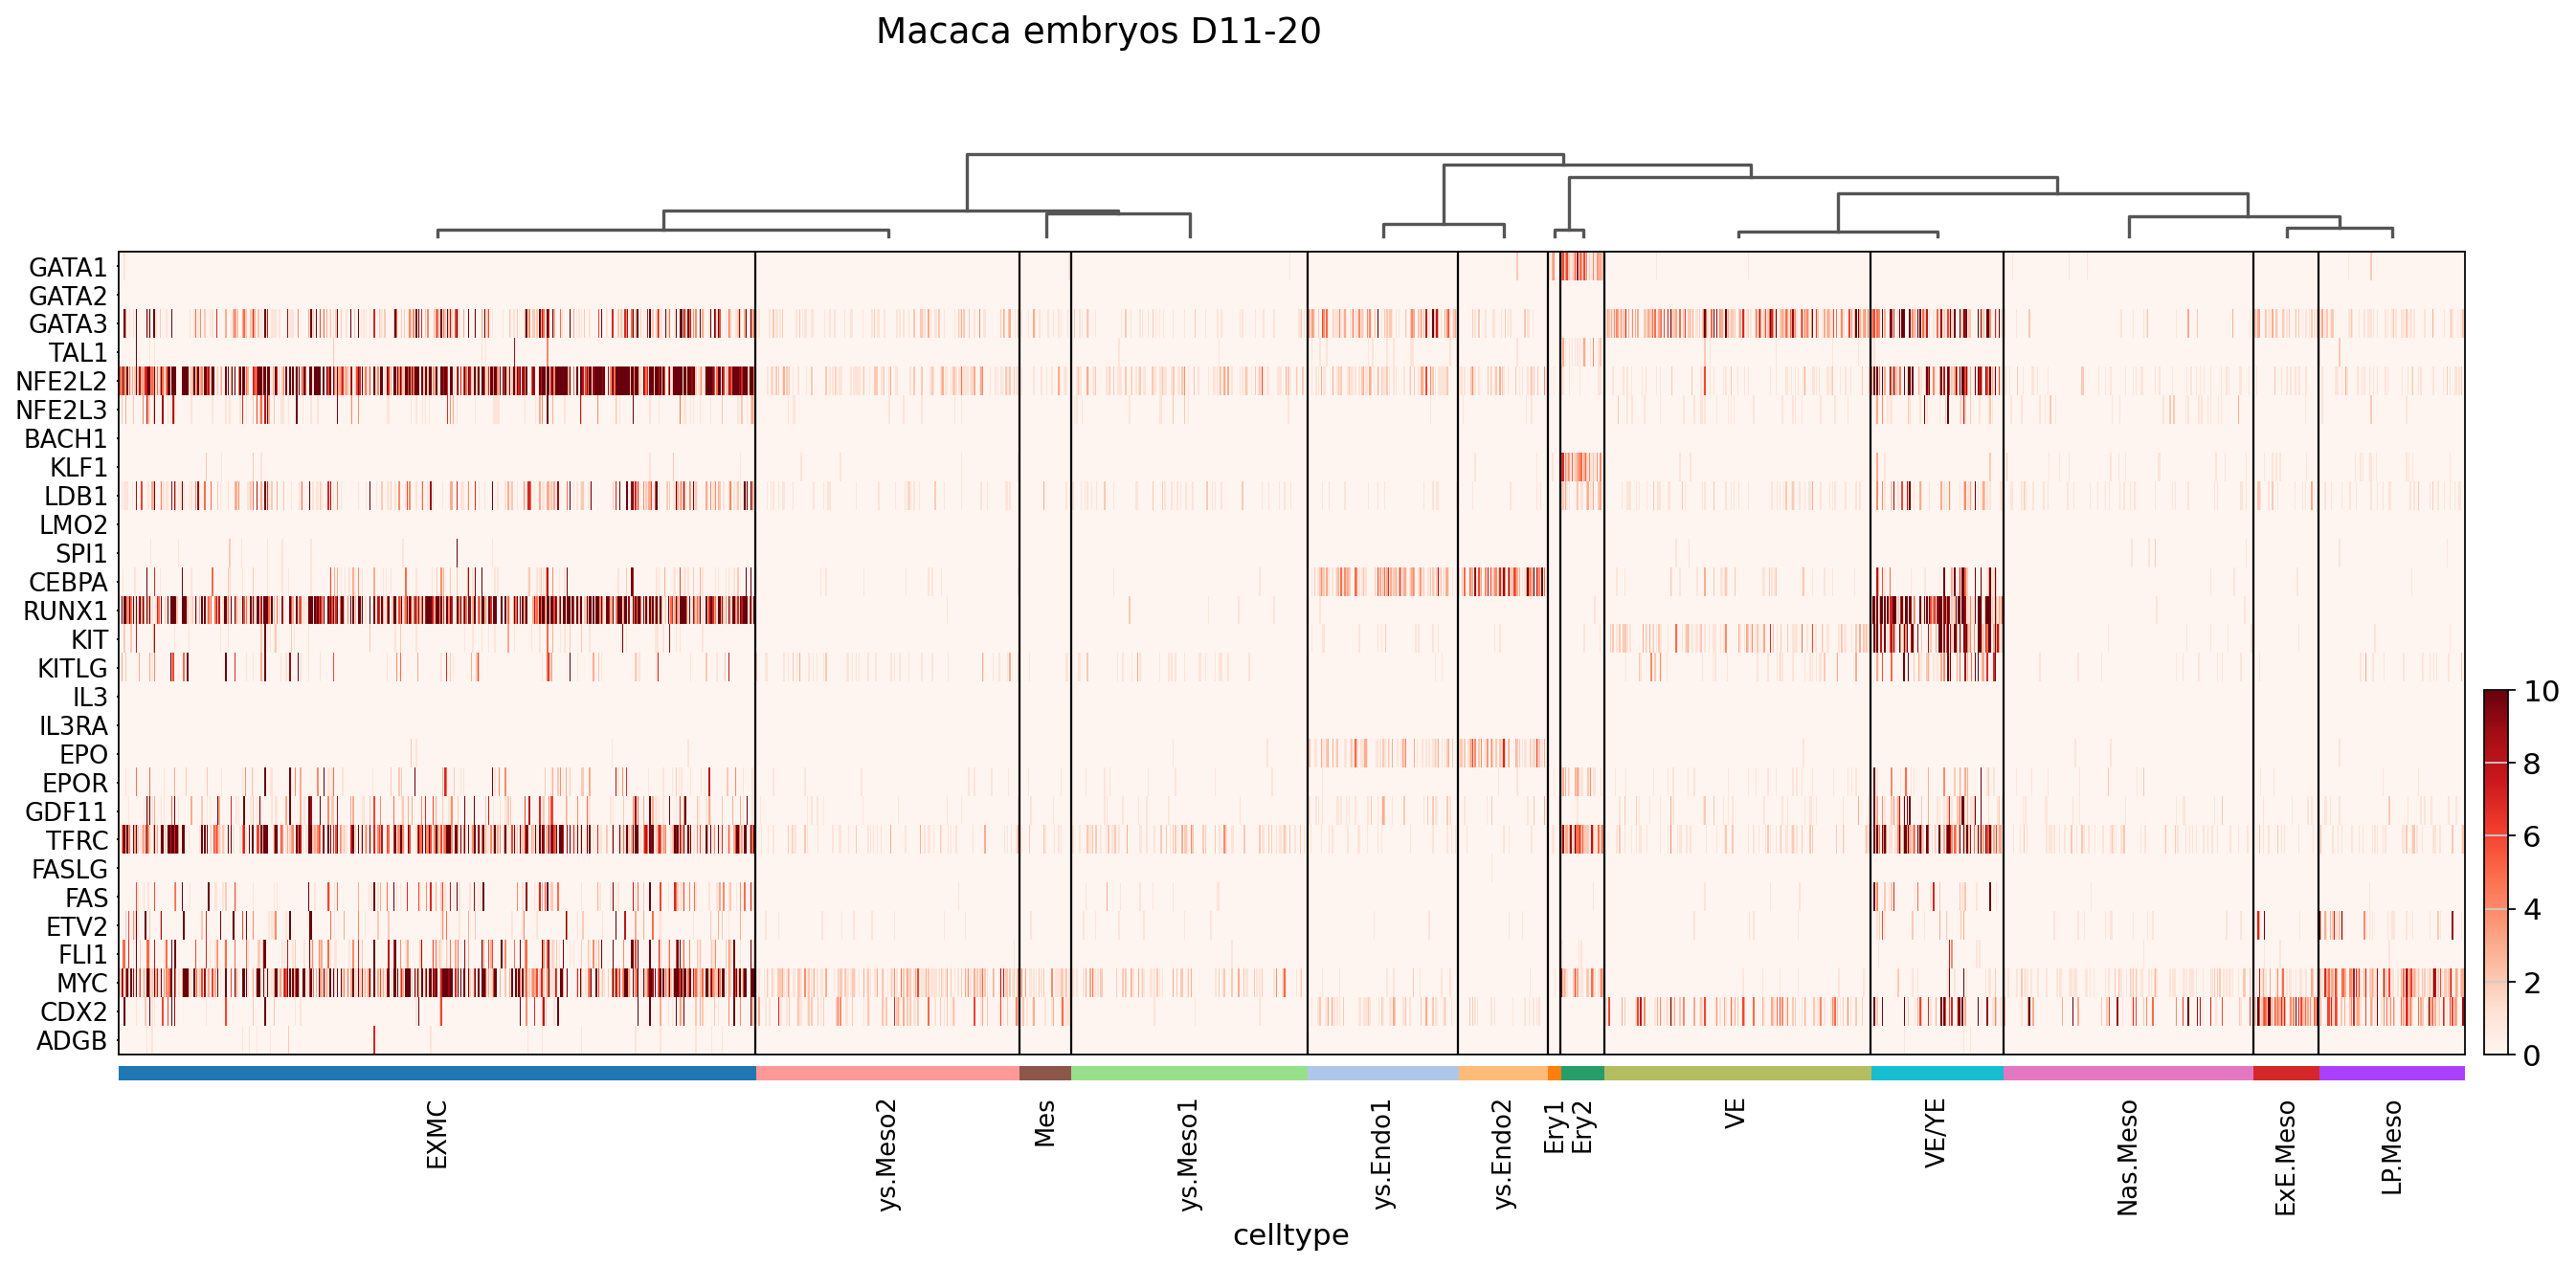

In [29]:
sc.pl.heatmap(
    adata,
    var_names=['GATA1', 'GATA2', 'GATA3', 'TAL1', 'NFE2L2', 
               'NFE2L3', 'BACH1', 'KLF1', 'LDB1', 'LMO2', 'SPI1', 'CEBPA', 
               'RUNX1', 'KIT', 'KITLG', 'IL3', 'IL3RA', 'EPO', 'EPOR', 'GDF11', 'TFRC', 
               'FASLG', 'FAS', 'ETV2', 'FLI1', 'MYC', 'CDX2', 'ADGB'],
    groupby='celltype',
    dendrogram=True,
    swap_axes=True,
    vmin=0,
    vmax=10,
    cmap='Reds',
    figsize=(20, 8),
    show=False  # Disable automatic show to add title manually
)

# Add title using matplotlib
plt.gcf().suptitle('Macaca embryos D11-20', y=1.02)  # `y` adjusts vertical position
plt.tight_layout()
plt.show()

In [4]:
emt_genes = ['EGF', 'EGFR', 'STAT3', 'MAPK1', 
             'TGFB1', 'TGFBR1', 'TNF', 'TNFRSF1A', 
            'NFKB1', 'ZEB1', 'ZEB2', 'TWIST1', 'SNAI1', 'SNAI2', 
            'PRRX1', 'FOXC2', 'SOX4', 'SOX9', 
            'VIM', 'CDH2', 'FN1', 'MMP2', 'MMP9', 'LOX', 'TGM2']
sc.tl.score_genes(adata, emt_genes, score_name='EMT')

wnt_genes = ['WNT1', 'WNT2', 'WNT3', 'WNT3A', 'WNT4', 'WNT5A', 'WNT7A', 'WNT8A', 'WNT11',  
             'FZD1', 'FZD2', 'FZD3', 'FZD4', 'FZD5', 'FZD6', 'FZD7', 'FZD8', 'FZD9', 'FZD10',  
             'LRP5', 'LRP6', 'DVL1', 'DVL2', 'DVL3',  
             'AXIN1', 'AXIN2', 'APC', 'GSK3B', 'CTNNB1', 'TCF7', 'TCF7L1', 'TCF7L2', 'LEF1'] 
sc.tl.score_genes(adata, wnt_genes, score_name='WNT')

hedgehog_genes = ['SHH', 'IHH', 'DHH',  
                 'PTCH1', 'PTCH2', 'SMO',  
                 'GLI1', 'GLI2', 'GLI3',  
                 'SUFU', 'HHIP']  
sc.tl.score_genes(adata, hedgehog_genes, score_name='hedgehog')

tgf_bmp_genes = ['TGFB1', 'TGFB2', 'TGFB3',  
                'BMP2', 'BMP4', 'BMP7', 'BMP9',  
                'SMAD1', 'SMAD2', 'SMAD3', 'SMAD4', 'SMAD5', 'SMAD9',  
                'TGFBR1', 'TGFBR2', 'BMPR1A', 'BMPR1B', 'BMPR2',  
                'NOG', 'CHRD', 'GREM1', 'FST']  
sc.tl.score_genes(adata, tgf_bmp_genes, score_name='TGF/BMP')

notch_genes = ['NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4',  
              'DLL1', 'DLL3', 'DLL4', 'JAG1', 'JAG2',  
              'RBPJ', 'HES1', 'HES5', 'HEY1', 'HEY2']  
sc.tl.score_genes(adata, notch_genes, score_name='NOTCH')

fgf_genes = ['FGF1', 'FGF2', 'FGF4', 'FGF8', 'FGF10',  
            'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4',  
            'GRB2', 'SOS1', 'RAS', 'RAF1', 'MAPK1', 'MAPK3']  
sc.tl.score_genes(adata, fgf_genes, score_name='FGF')

retinoic_acid_genes = ['RARA', 'RARB', 'RARG',  
                      'RXRA', 'RXRB', 'RXRG',  
                      'CYP26A1', 'CYP26B1', 'CYP26C1',  
                      'ALDH1A1', 'ALDH1A2', 'ALDH1A3']  
sc.tl.score_genes(adata, retinoic_acid_genes, score_name='RA')

nodal_genes = ['NODAL', 'LEFTY1', 'LEFTY2',  
              'ACVR1B', 'ACVR2A', 'ACVR2B',  
              'SMAD2', 'SMAD3', 'SMAD4',  
              'PITX2', 'FOXH1']  
sc.tl.score_genes(adata, nodal_genes, score_name='NODAL')

jak_stat_genes = ['JAK1', 'JAK2', 'JAK3', 'TYK2',  
                 'STAT1', 'STAT2', 'STAT3', 'STAT4', 'STAT5A', 'STAT5B', 'STAT6',  
                 'IL6ST', 'SOCS1', 'SOCS3', 'PIAS1']  
sc.tl.score_genes(adata, jak_stat_genes, score_name='JAK/STAT')

computing score 'EMT'
    finished: added
    'EMT', score of gene set (adata.obs).
    357 total control genes are used. (0:00:00)
computing score 'WNT'
    finished: added
    'WNT', score of gene set (adata.obs).
    497 total control genes are used. (0:00:00)
computing score 'hedgehog'
    finished: added
    'hedgehog', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)
computing score 'TGF/BMP'
    finished: added
    'TGF/BMP', score of gene set (adata.obs).
    299 total control genes are used. (0:00:00)
computing score 'NOTCH'
    finished: added
    'NOTCH', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)
computing score 'FGF'
    finished: added
    'FGF', score of gene set (adata.obs).
    349 total control genes are used. (0:00:00)
computing score 'RA'
    finished: added
    'RA', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)
computing score 'NODAL'
    finished: added
    'NODAL',

In [5]:
scores = ['EMT', 'WNT', 'hedgehog', 'TGF/BMP', 'NOTCH', 'FGF', 'RA', 'JAK/STAT']

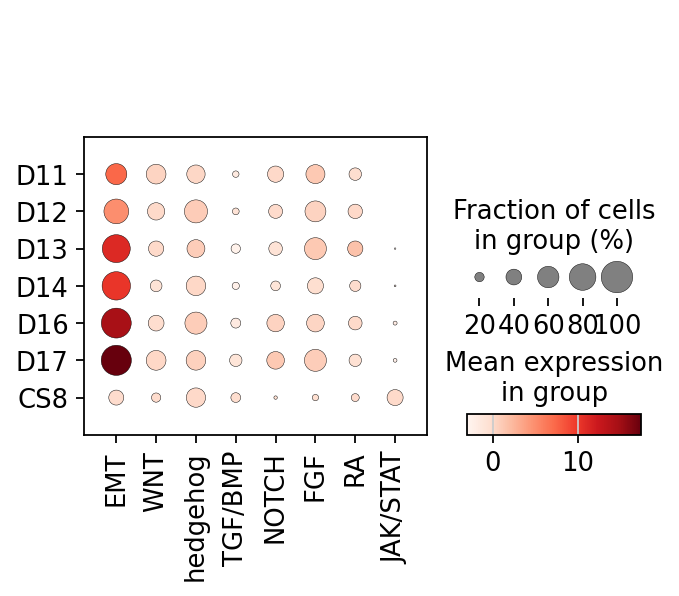

In [33]:
sc.pl.dotplot(adata, groupby=['EmbryoStage'], var_names=scores)

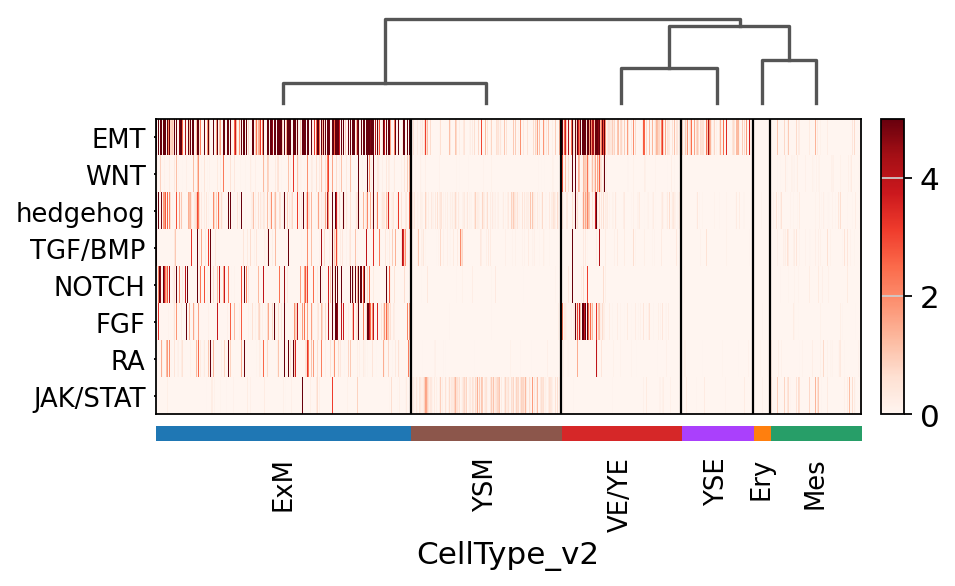

In [8]:
sc.pl.heatmap(
    adata,
    var_names=scores,
    groupby='CellType_v2',  # Replace with your cell population column
    # layer='log1p',           # Use log-normalized data if available
    dendrogram=True,         # Enable clustering
    swap_axes=True,         # Genes=rows, Cell types=columns
    vmin=0,       # Minimum value for color scale
    vmax=5,
    cmap='Reds',          # Color scheme
    figsize=(6, 3.5),         # Adjust size as needed
    show=True,
)

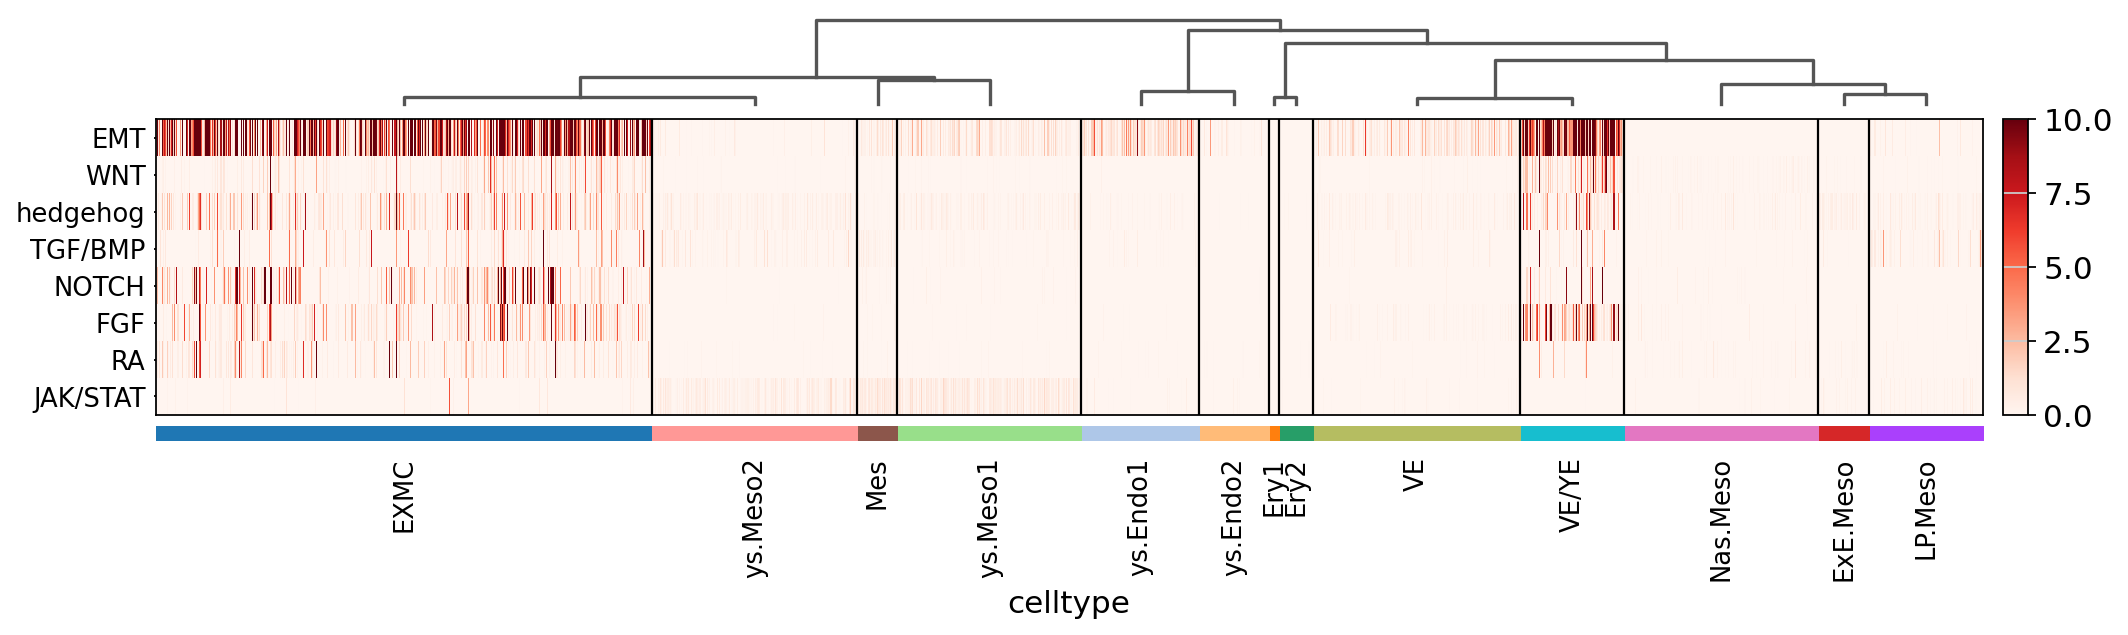

In [36]:
sc.pl.heatmap(
    adata,
    var_names=scores,
    groupby='celltype',  # Replace with your cell population column
    # layer='log1p',           # Use log-normalized data if available
    dendrogram=True,         # Enable clustering
    swap_axes=True,         # Genes=rows, Cell types=columns
    vmin=0,       # Minimum value for color scale
    vmax=10,
    cmap='Reds',          # Color scheme
    figsize=(15, 3.5),         # Adjust size as needed
    show=True,
)